In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset from sklearn

from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['species'] = iris.target


In [3]:
# load dataset from seaborn
df = sns.load_dataset('iris')


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df.iloc[:,-1])
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

<Axes: xlabel='sepal_width', ylabel='petal_length'>

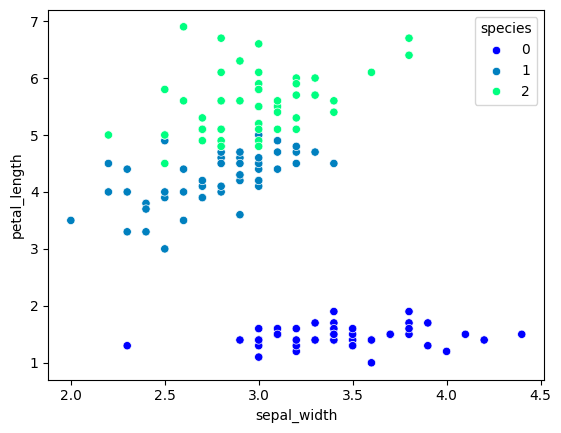

In [5]:
sns.scatterplot(data=df, x='sepal_width', y='petal_length', hue='species', palette='winter')

In [6]:
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:,:].sample(5)


In [7]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

In [9]:
def evalute(clf, X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))

## 1. Bagging


In [10]:
df.shape

(150, 5)

In [11]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


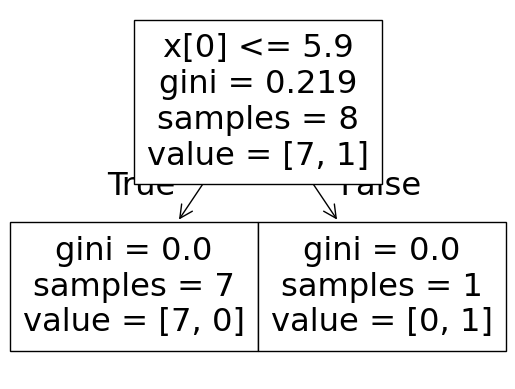

Accuracy Score:  0.8


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


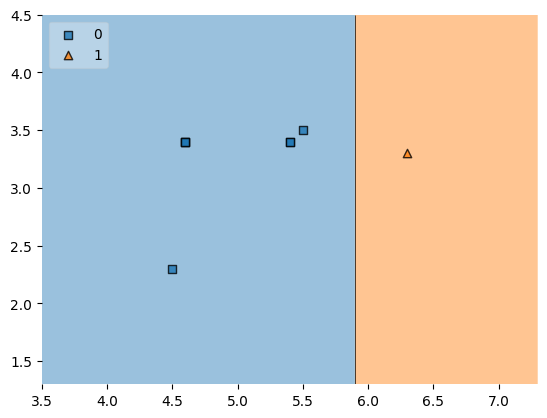

In [12]:
dt_bag1 = DecisionTreeClassifier()
evalute(dt_bag1,X,y)

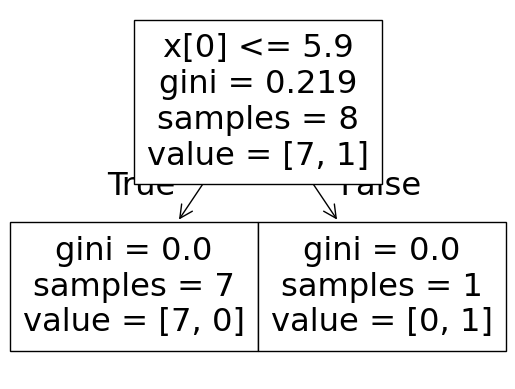

Accuracy Score:  0.8


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


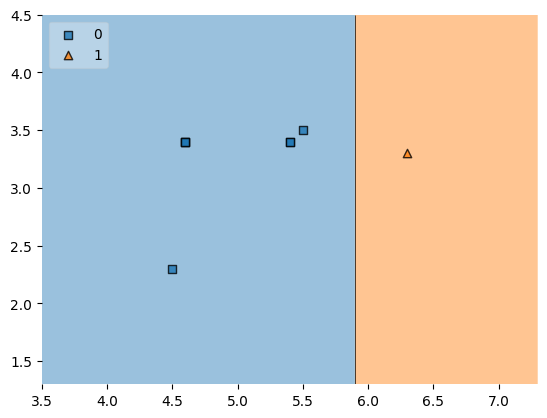

In [13]:
dt_bag2 = DecisionTreeClassifier()
evalute(dt_bag2, X,y)

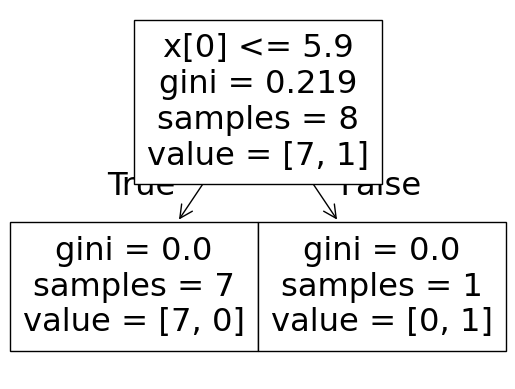

Accuracy Score:  0.8


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


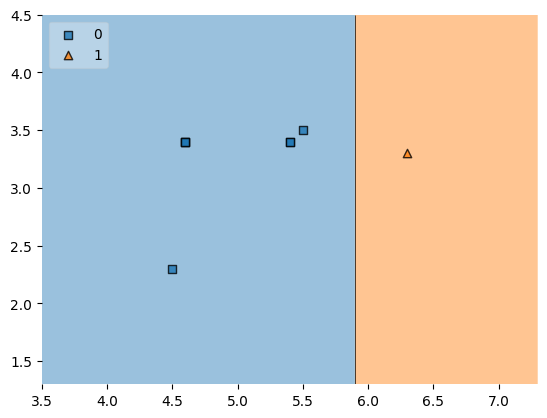

In [14]:
dt_bag3 = DecisionTreeClassifier()
evalute(dt_bag3, X,y)

## 2. Predict

In [15]:
df_test

,sepal_length,sepal_width,petal_length,petal_width,species
88,5.6,3.0,4.1,1.3,1
144,6.7,3.3,5.7,2.5,2
98,5.1,2.5,3.0,1.1,1
105,7.6,3.0,6.6,2.1,2
139,6.9,3.1,5.4,2.1,2


In [20]:
print('Predictor', dt_bag1.predict([[5.6, 3.0]]))
print('Predictor2":', dt_bag2.predict([[5.6,3.0]]))
print('Predictor3:', dt_bag3.predict([[5.6,3.0]]))

Predictor [0]
Predictor2": [0]
Predictor3: [0]


c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\acer\anaconda3\envs\universal\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [17]:
X

,sepal_length,sepal_width
6,4.6,3.4
20,5.4,3.4
6,4.6,3.4
41,4.5,2.3
20,5.4,3.4
56,6.3,3.3
36,5.5,3.5
6,4.6,3.4
